In [41]:
# 2019~2024년 병합
import pandas as pd
import chardet
import os

# 인코딩 자동 감지 함수
def detect_encoding(file_path, n_lines=1000):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read(n_lines))
    return result['encoding']

years = range(2019, 2025)

# 결과 저장용 리스트
temp_list = []
dust_list = []
trading_list = []

# 연도별 파일 불러오기
for year in years:
    
    temp_file = f"../../Data/Temp/Temp_{year}.csv"
    dust_file = f"../../Data/Dust/Dust_{year}.csv"
    trading_file = f"../../Data/Trading_Area/Trading_Area_{year}.csv"

    # 인코딩 감지
    temp_enc = detect_encoding(temp_file)
    dust_enc = detect_encoding(dust_file)
    trading_enc = detect_encoding(trading_file)

    # 파일 읽기
    temp_df = pd.read_csv(temp_file, encoding=temp_enc)
    dust_df = pd.read_csv(dust_file, encoding=dust_enc)
    trading_df = pd.read_csv(trading_file, encoding=trading_enc)

    # 연도 정보 추가
    temp_df['연도'] = year
    dust_df['연도'] = year
    trading_df['연도'] = int(str(trading_df['기준_년분기_코드'].iloc[0])[:4])  # 혹시 몰라서 다시 처리

    # 리스트에 추가
    temp_list.append(temp_df)
    dust_list.append(dust_df)
    trading_list.append(trading_df)

# 최종 데이터프레임 병합
df_temp = pd.concat(temp_list, ignore_index=True)
df_dust = pd.concat(dust_list, ignore_index=True)
df_trading = pd.concat(trading_list, ignore_index=True)

# 확인
print("기온 데이터:", df_temp.shape)
print("미세먼지 데이터:", df_dust.shape)
print("상권 데이터:", df_trading.shape)


기온 데이터: (2192, 5)
미세먼지 데이터: (54800, 12)
상권 데이터: (408221, 54)


In [42]:
# 컬럼 구조 및 연도 분포 확인

# 각 데이터프레임 컬럼명 출력
print("Temperature columns:")
print(df_temp.columns.tolist())

print("\nDust columns:")
print(df_dust.columns.tolist())

print("\nTrading area columns:")
print(df_trading.columns.tolist())

# 연도 분포 확인
print("\nTemperature data by year:")
print(df_temp['연도'].value_counts().sort_index())

print("\nDust data by year:")
print(df_dust['연도'].value_counts().sort_index())

print("\nTrading area data by year:")
print(df_trading['연도'].value_counts().sort_index())


Temperature columns:
['지점', '지점명', '일시', '평균기온(°C)', '연도']

Dust columns:
['측정일시', '권역명', '측정소명', '이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)', '아황산가스농도(ppm)', '미세먼지농도(㎍/㎥)', '초미세먼지농도(㎍/㎥)', '연도', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']

Trading area columns:
['기준_년분기_코드', '행정동_코드', '행정동_코드_명', '서비스_업종_코드', '서비스_업종_코드_명', '당월_매출_금액', '당월_매출_건수', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수', '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수', '여성_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수

In [43]:
# 연도별 미세먼지 컬럼명 확인

import chardet
import pandas as pd

# 인코딩 감지 함수 재정의
def detect_encoding(file_path, n_lines=1000):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read(n_lines))
    return result['encoding']

# 연도별로 컬럼 확인
dust_column_changes = {}

for year in range(2019, 2025):
    file_path = f"../../Data/Dust/Dust_{year}.csv"
    encoding = detect_encoding(file_path)
    df = pd.read_csv(file_path, encoding=encoding, nrows=1)
    dust_column_changes[year] = df.columns.tolist()

# 출력
for year, columns in dust_column_changes.items():
    print(f"{year} columns: {columns}")


2019 columns: ['측정일시', '권역명', '측정소명', '이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)', '아황산가스농도(ppm)', '미세먼지농도(㎍/㎥)', '초미세먼지농도(㎍/㎥)']
2020 columns: ['측정일시', '권역명', '측정소명', '이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)', '아황산가스농도(ppm)', '미세먼지농도(㎍/㎥)', '초미세먼지농도(㎍/㎥)']
2021 columns: ['측정일시', '권역명', '측정소명', '이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)', '아황산가스농도(ppm)', '미세먼지농도(㎍/㎥)', '초미세먼지농도(㎍/㎥)']
2022 columns: ['측정일시', '권역명', '측정소명', '이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)', '아황산가스농도(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']
2023 columns: ['측정일시', '권역명', '측정소명', '이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)', '아황산가스농도(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']
2024 columns: ['측정일시', '권역명', '측정소명', '이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)', '아황산가스농도(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']


In [44]:
# 연도별 평균 미세먼지 계산

# 결과 저장 리스트
dust_yearly_avg = []

for year in range(2019, 2025):
    file_path = f"../../Data/Dust/Dust_{year}.csv"
    encoding = detect_encoding(file_path)
    df = pd.read_csv(file_path, encoding=encoding)

    # 연도별로 컬럼명 다름: 2021까지는 '미세먼지농도(㎍/㎥)', 이후는 '미세먼지(㎍/㎥)'
    if year <= 2021:
        dust_col = '미세먼지농도(㎍/㎥)'
    else:
        dust_col = '미세먼지(㎍/㎥)'

    # 날짜 컬럼 정제 및 연도 추출
    df['연도'] = pd.to_datetime(df['측정일시'], format='%Y%m%d').dt.year

    # 평균값 계산
    avg = df[dust_col].mean()
    dust_yearly_avg.append({'연도': year, '평균미세먼지': avg})

# 데이터프레임 변환
df_dust_avg = pd.DataFrame(dust_yearly_avg)

# 확인
print(df_dust_avg)


     연도     평균미세먼지
0  2019  41.764026
1  2020  35.119824
2  2021  37.899647
3  2022  32.884493
4  2023  37.734949
5  2024  31.234721


In [45]:
# 연도별 평균 기온 계산

# 연도와 기온 컬럼만 선택
df_temp_avg = df_temp[['연도', '평균기온(°C)']].groupby('연도').mean().reset_index()
df_temp_avg = df_temp_avg.rename(columns={'평균기온(°C)': '평균기온'})

# 확인
print(df_temp_avg)


     연도       평균기온
0  2019  13.598904
1  2020  13.271858
2  2021  13.752055
3  2022  13.296164
4  2023  14.109041
5  2024  14.875410


In [46]:
# 연도별 총매출 계산 (행정동 + 업종 단위)

df_sales = df_trading[['연도', '행정동_코드', '행정동_코드_명', '서비스_업종_코드_명', '당월_매출_금액']].copy()

# 연도, 행정동, 업종 단위로 총매출 집계
df_sales_grouped = df_sales.groupby(['연도', '행정동_코드', '행정동_코드_명', '서비스_업종_코드_명'])['당월_매출_금액'].sum().reset_index()
df_sales_grouped = df_sales_grouped.rename(columns={'당월_매출_금액': '총매출'})

# 확인
print(df_sales_grouped.head())


     연도    행정동_코드 행정동_코드_명 서비스_업종_코드_명          총매출
0  2019  11110515    청운효자동         미용실    676679850
1  2019  11110515    청운효자동       분식전문점   2081525885
2  2019  11110515    청운효자동          서적  16233437173
3  2019  11110515    청운효자동        섬유제품    929224411
4  2019  11110515    청운효자동         세탁소    103455466


In [47]:
# 매출 증감률 및 순위 계산

# 행정동, 업종, 연도 순으로 정렬
df_sales_grouped = df_sales_grouped.sort_values(by=['행정동_코드', '서비스_업종_코드_명', '연도'])

# 전년도 총매출 추가
df_sales_grouped['전년도_총매출'] = df_sales_grouped.groupby(['행정동_코드', '서비스_업종_코드_명'])['총매출'].shift(1)

# 매출 증감률 계산
df_sales_grouped['매출증감률'] = ((df_sales_grouped['총매출'] - df_sales_grouped['전년도_총매출']) / df_sales_grouped['전년도_총매출']) * 100

# 순위 계산: 연도 + 행정동 기준으로 업종 매출 순위
df_sales_grouped['순위'] = df_sales_grouped.groupby(['연도', '행정동_코드'])['총매출'].rank(method='min', ascending=False).astype(int)

# 소수점 2자리로 반올림
df_sales_grouped['매출증감률'] = df_sales_grouped['매출증감률'].round(2)

# 결과 확인 예로 청운효자동 - 가전제품수리 확인인
example = df_sales_grouped[
    (df_sales_grouped['행정동_코드_명'] == '청운효자동') &
    (df_sales_grouped['서비스_업종_코드_명'] == '가전제품수리')
].sort_values('연도')

print("청운효자동 - 가전제품수리 연도별 매출 흐름:")
print(example[['연도', '총매출', '전년도_총매출', '매출증감률', '순위']])


청운효자동 - 가전제품수리 연도별 매출 흐름:
         연도       총매출     전년도_총매출   매출증감률  순위
34138  2021  13837091         NaN     NaN  38
52174  2022  57433405  13837091.0  315.07  35
70095  2023  80368856  57433405.0   39.93  34
87848  2024  33597594  80368856.0  -58.20  31


In [48]:
# 청운효자동 - 가전제품수리 조합의 2020년 존재 여부 확인 (2021년도 매출증감률이 NaN나와서 확인해봄)
mask = (
    (df_sales_grouped['연도'] == 2020) &
    (df_sales_grouped['행정동_코드_명'] == '청운효자동') &
    (df_sales_grouped['서비스_업종_코드_명'] == '가전제품수리')
)

result = df_sales_grouped[mask]

print("2020년 청운효자동 - 가전제품수리 데이터 존재 여부:")
print(result)


2020년 청운효자동 - 가전제품수리 데이터 존재 여부:
Empty DataFrame
Columns: [연도, 행정동_코드, 행정동_코드_명, 서비스_업종_코드_명, 총매출, 전년도_총매출, 매출증감률, 순위]
Index: []


In [49]:
# 기온 + 미세먼지 + 매출 데이터 병합

# 기온: df_temp_avg → 연도, 평균기온
# 미세먼지: df_dust_avg → 연도, 평균미세먼지

df_merged = df_sales_grouped.merge(df_temp_avg, on='연도', how='left')
df_merged = df_merged.merge(df_dust_avg, on='연도', how='left')

# 확인
print(df_merged.head())


     연도    행정동_코드 행정동_코드_명 서비스_업종_코드_명       총매출     전년도_총매출   매출증감률  순위  \
0  2021  11110515    청운효자동          가방  22673366         NaN     NaN  35   
1  2023  11110515    청운효자동          가방   9992821  22673366.0  -55.93  38   
2  2021  11110515    청운효자동      가전제품수리  13837091         NaN     NaN  38   
3  2022  11110515    청운효자동      가전제품수리  57433405  13837091.0  315.07  35   
4  2023  11110515    청운효자동      가전제품수리  80368856  57433405.0   39.93  34   

        평균기온     평균미세먼지  
0  13.752055  37.899647  
1  14.109041  37.734949  
2  13.752055  37.899647  
3  13.296164  32.884493  
4  14.109041  37.734949  


In [50]:
# 분석 결과 CSV 저장 (공통 포맷: 연도, 행정동코드, 행정동명, 업종, 총매출, 매출증감률, 순위)

df_analysis = df_merged[['연도', '행정동_코드', '행정동_코드_명', '서비스_업종_코드_명', '총매출', '매출증감률', '순위']].copy()

df_analysis = df_analysis.rename(columns={
    '행정동_코드': '행정동코드',
    '행정동_코드_명': '행정동명',
    '서비스_업종_코드_명': '업종'
})

# 연도 오름차순 정렬
df_analysis = df_analysis.sort_values(by=['연도', '행정동코드', '업종'])

# 저장
df_analysis.to_csv("analysis_2019_2024.csv", index=False, encoding='utf-8-sig')

# 확인
print("분석 결과 CSV 저장 완료: analysis_2019_2024.csv")
print(df_analysis.head())


분석 결과 CSV 저장 완료: analysis_2019_2024.csv
      연도     행정동코드   행정동명     업종          총매출  매출증감률  순위
15  2019  11110515  청운효자동    미용실    676679850    NaN  15
26  2019  11110515  청운효자동  분식전문점   2081525885    NaN   9
32  2019  11110515  청운효자동     서적  16233437173    NaN   1
38  2019  11110515  청운효자동   섬유제품    929224411    NaN  12
44  2019  11110515  청운효자동    세탁소    103455466    NaN  27


In [51]:
# 2025년 기온 및 미세먼지 예측 (선형회귀 사용)

from sklearn.linear_model import LinearRegression
import numpy as np

# 기온 예측
X_temp = df_temp_avg['연도'].values.reshape(-1, 1)
y_temp = df_temp_avg['평균기온'].values
model_temp = LinearRegression().fit(X_temp, y_temp)
pred_temp_2025 = model_temp.predict(np.array([[2025]]))[0]

# 미세먼지 예측
X_dust = df_dust_avg['연도'].values.reshape(-1, 1)
y_dust = df_dust_avg['평균미세먼지'].values
model_dust = LinearRegression().fit(X_dust, y_dust)
pred_dust_2025 = model_dust.predict(np.array([[2025]]))[0]

# 출력 확인
print(f"예측된 2025년 평균 기온: {pred_temp_2025:.2f}°C")
print(f"예측된 2025년 평균 미세먼지: {pred_dust_2025:.2f}㎍/㎥")


예측된 2025년 평균 기온: 14.66°C
예측된 2025년 평균 미세먼지: 31.12㎍/㎥


In [53]:
# 2025년 예측 (랜덤포레스트 사용용)

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# 업종과 행정동 인코딩
df_model = df_merged.copy()
df_model['업종코드'] = LabelEncoder().fit_transform(df_model['서비스_업종_코드_명'])
df_model['행정동코드_인코딩'] = LabelEncoder().fit_transform(df_model['행정동_코드'].astype(str))

# 학습 데이터 구성
features = ['평균기온', '평균미세먼지', '업종코드', '행정동코드_인코딩']
X = df_model[features]
y = df_model['총매출']

# 결측치 제거
X = X[y.notna()]
y = y[y.notna()]

# 모델 학습
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# 2025년 예측용 입력 데이터 준비
df_2024 = df_model[df_model['연도'] == 2024].copy()
df_2025 = df_2024[['행정동_코드', '행정동_코드_명', '서비스_업종_코드_명', '업종코드', '행정동코드_인코딩']].copy()
df_2025['연도'] = 2025
df_2025['평균기온'] = pred_temp_2025
df_2025['평균미세먼지'] = pred_dust_2025

# 예측 수행
X_2025 = df_2025[['평균기온', '평균미세먼지', '업종코드', '행정동코드_인코딩']]
df_2025['예측_총매출'] = rf.predict(X_2025)

df_2025 = df_2025.rename(columns={
    '행정동_코드': '행정동코드',
    '행정동_코드_명': '행정동명',
    '서비스_업종_코드_명': '업종'
})

# 순위 계산
df_2025['순위'] = df_2025.groupby('행정동코드')['예측_총매출'].rank(method='min', ascending=False).astype(int)

df_2025 = df_2025.rename(columns={
    '행정동_코드': '행정동코드',
    '행정동_코드_명': '행정동명',
    '서비스_업종_코드_명': '업종'
})

df_2025 = df_2025[['연도', '행정동코드', '행정동명', '업종', '예측_총매출', '순위']].sort_values(by='예측_총매출', ascending=False)

# 결과 확인
print(df_2025.head())


         연도     행정동코드   행정동명          업종        예측_총매출  순위
75184  2025  11590520  노량진2동       수산물판매  2.906409e+12   1
18780  2025  11230545    제기동         청과상  2.159451e+12   1
67962  2025  11545510    가산동        일반의류  1.962242e+12   1
8746   2025  11170625   한강로동  컴퓨터및주변장치판매  1.522284e+12   1
74935  2025  11590510  노량진1동       수산물판매  1.176288e+12   1


In [54]:
# 2025년 예측 결과 CSV 저장

#컬럼 확인인
df_2025.to_csv("prediction_2025.csv", index=False, encoding='utf-8-sig')

# 확인 메시지
print("2025년 예측 결과 CSV 저장 완료: prediction_2025.csv")
print(df_2025.head())


2025년 예측 결과 CSV 저장 완료: prediction_2025.csv
         연도     행정동코드   행정동명          업종        예측_총매출  순위
75184  2025  11590520  노량진2동       수산물판매  2.906409e+12   1
18780  2025  11230545    제기동         청과상  2.159451e+12   1
67962  2025  11545510    가산동        일반의류  1.962242e+12   1
8746   2025  11170625   한강로동  컴퓨터및주변장치판매  1.522284e+12   1
74935  2025  11590510  노량진1동       수산물판매  1.176288e+12   1


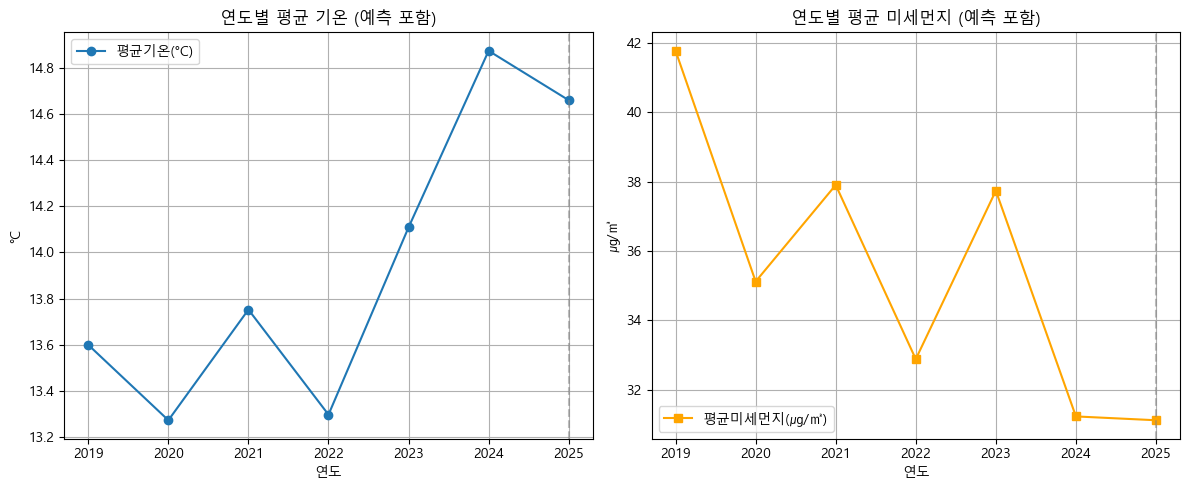


[2025년 외부 요인 예측 해석]
- 2025년 평균 기온은 약 14.66°C로, 과거 평균과 유사한 수준입니다.
- 2025년 평균 미세먼지는 약 31.12㎍/㎥로 전년보다 감소할 것으로 예상됩니다.


In [55]:
# 해석 + 시각화

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False

# 연도별 시계열 데이터 구성
years = df_temp_avg['연도'].tolist() + [2025]
temps = df_temp_avg['평균기온'].tolist() + [pred_temp_2025]
dusts = df_dust_avg['평균미세먼지'].tolist() + [pred_dust_2025]

# 시각화
plt.figure(figsize=(12, 5))

# 기온
plt.subplot(1, 2, 1)
plt.plot(years, temps, marker='o', label='평균기온(°C)')
plt.axvline(2025, color='gray', linestyle='--', alpha=0.5)
plt.title("연도별 평균 기온 (예측 포함)")
plt.xlabel("연도")
plt.ylabel("°C")
plt.grid(True)
plt.legend()

# 미세먼지
plt.subplot(1, 2, 2)
plt.plot(years, dusts, marker='s', color='orange', label='평균미세먼지(㎍/㎥)')
plt.axvline(2025, color='gray', linestyle='--', alpha=0.5)
plt.title("연도별 평균 미세먼지 (예측 포함)")
plt.xlabel("연도")
plt.ylabel("㎍/㎥")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

max_temp = df_temp_avg['평균기온'].max()
min_temp = df_temp_avg['평균기온'].min()
last_dust = df_dust_avg[df_dust_avg['연도'] == 2024]['평균미세먼지'].values[0]

# 기온 해석
if pred_temp_2025 > max_temp:
    temp_comment = f"- 2025년 평균 기온은 약 {pred_temp_2025:.2f}°C로, 최근 6년 중 가장 높은 수준입니다."
elif pred_temp_2025 < min_temp:
    temp_comment = f"- 2025년 평균 기온은 약 {pred_temp_2025:.2f}°C로, 최근 6년 중 가장 낮은 수준입니다."
else:
    temp_comment = f"- 2025년 평균 기온은 약 {pred_temp_2025:.2f}°C로, 과거 평균과 유사한 수준입니다."

# 미세먼지 해석
if pred_dust_2025 < last_dust:
    dust_comment = f"- 2025년 평균 미세먼지는 약 {pred_dust_2025:.2f}㎍/㎥로 전년보다 감소할 것으로 예상됩니다."
elif pred_dust_2025 > last_dust:
    dust_comment = f"- 2025년 평균 미세먼지는 약 {pred_dust_2025:.2f}㎍/㎥로 전년보다 증가할 것으로 예상됩니다."
else:
    dust_comment = f"- 2025년 평균 미세먼지는 전년과 비슷한 수준인 약 {pred_dust_2025:.2f}㎍/㎥로 예상됩니다."

# 종합 출력
print("\n[2025년 외부 요인 예측 해석]")
print(temp_comment)
print(dust_comment)


[2025년 유망 업종 예측 결과]
1. 한식음식점 → 평균 예측 매출 약 37,735,192,780원
2. 수산물판매 → 평균 예측 매출 약 29,111,589,286원
3. 일반의원 → 평균 예측 매출 약 18,926,891,869원
4. 컴퓨터및주변장치판매 → 평균 예측 매출 약 16,904,825,219원
5. 일반의류 → 평균 예측 매출 약 16,881,879,996원


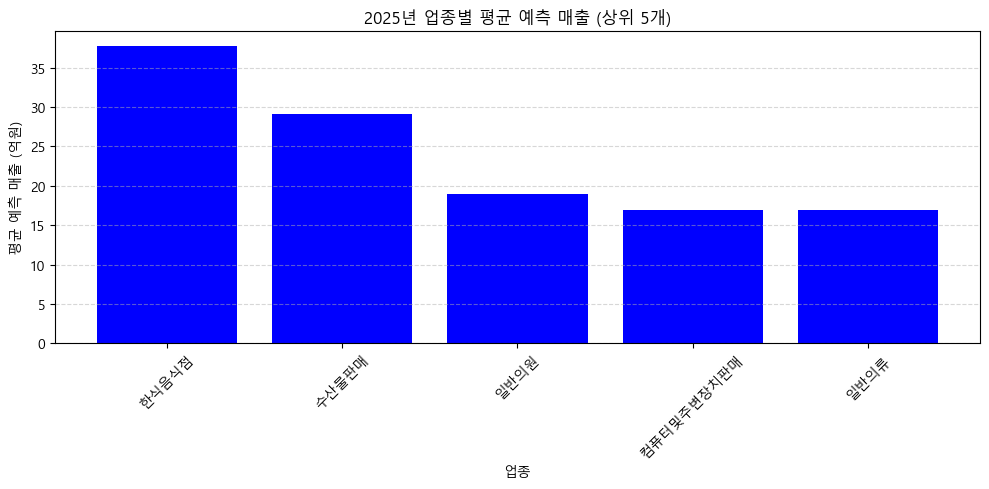

In [56]:
# 예측 결과 기반 유망 업종 해석

# 업종별 평균 예측 매출 계산
top_industry = df_2025.groupby('업종')['예측_총매출'].mean().sort_values(ascending=False).reset_index()

# 상위 5개 업종 추출
top5 = top_industry.head(5)

# 결과 출력
print("[2025년 유망 업종 예측 결과]")
for i, row in top5.iterrows():
    업종 = row['업종']
    예측매출 = row['예측_총매출']
    print(f"{i+1}. {업종} → 평균 예측 매출 약 {예측매출:,.0f}원")

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(top5['업종'], top5['예측_총매출'] / 1e9, color='blue')
plt.title("2025년 업종별 평균 예측 매출 (상위 5개)")
plt.ylabel("평균 예측 매출 (억원)")
plt.xlabel("업종")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


[2025년 '청운효자동' 유망 업종 예측 결과]
203. 한식음식점 → 예측 매출 약 23,968,392,914원
180. 커피-음료 → 예측 매출 약 21,524,549,547원
38. 서적 → 예측 매출 약 15,221,151,628원
85. 양식음식점 → 예측 매출 약 12,548,722,447원
62. 슈퍼마켓 → 예측 매출 약 7,590,009,937원


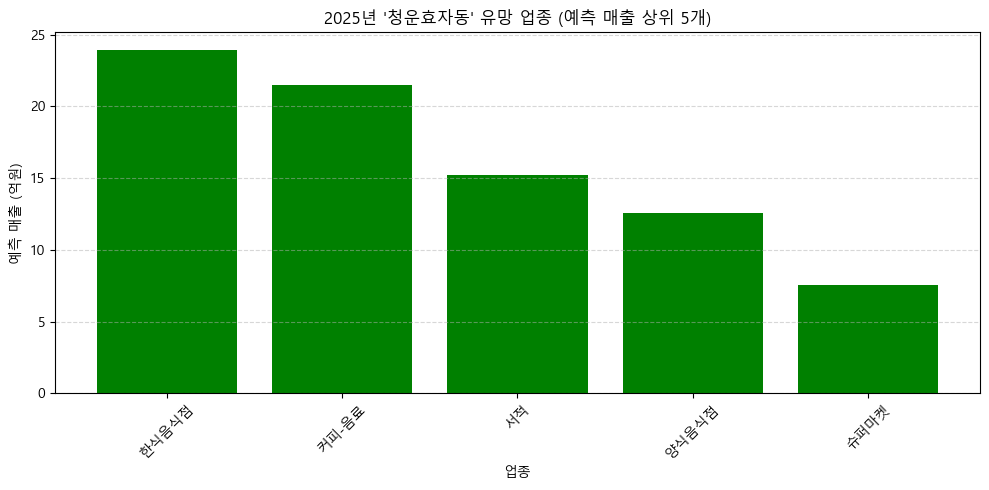

In [57]:
# 특정 행정동 기준 유망 업종 추출 및 시각화 (청운 효자동 기준으로 해봤음.)
target_dong = "청운효자동"

# 해당 동의 업종별 예측 총매출 정리
dong_df = df_2025[df_2025['행정동명'] == target_dong]
dong_top5 = dong_df.sort_values(by='예측_총매출', ascending=False).head(5)

# 결과 출력
print(f"[2025년 '{target_dong}' 유망 업종 예측 결과]")
for i, row in dong_top5.iterrows():
    업종 = row['업종']
    예측매출 = row['예측_총매출']
    print(f"{i+1}. {업종} → 예측 매출 약 {예측매출:,.0f}원")

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(dong_top5['업종'], dong_top5['예측_총매출'] / 1e9, color='green')
plt.title(f"2025년 '{target_dong}' 유망 업종 (예측 매출 상위 5개)")
plt.ylabel("예측 매출 (억원)")
plt.xlabel("업종")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
